In [1]:
import numpy as np
import os
import logging
import typing as t
from copy import deepcopy


In [2]:
import razor.flow as rf
from razor import api

In [3]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)

In [4]:
@rf.block
class STDIn:
    filename: t.Any
    a: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    b: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    c: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    d: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    e: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    f: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    g: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)        
    h: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    i: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    arr1: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    arr2: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
    
    
    def run(self):
        with open(project_space_path(self.filename), 'r') as fil:
            lines = fil.readlines()
            a1 = lines[-1]
            a2 = lines[-2]
            lines = lines[:-2]
        
        a1 = a1.strip('[]').strip('\n').split(',')
        temp_list=[]
        
        self.logger.info("Length of array:")
        self.logger.info(len(a1))
        cnt=0
        for each in a1:
            cnt+=1
            temp = int(each)
#             self.logger.info("temp after")
#             self.logger.info(temp)
#             self.logger.info(type(temp))
            temp_list.append(temp)
            
        a1=deepcopy(temp_list)
#         a1 = [int(each) for each in a1]
        a2 = a2.strip('[]').strip('\n').split(',')
        a2 = [int(each) for each in a2]
        
        self.a.put(int(lines[0]))
        self.b.put(int(lines[1]))
        self.c.put(int(lines[2]))
        self.d.put(int(lines[3]))
        self.e.put(int(lines[4]))
        self.f.put(int(lines[5]))
        self.g.put(int(lines[6]))
        self.h.put(int(lines[7]))
        self.i.put(int(lines[8]))
        self.arr1.put(a1)
        self.arr2.put(a2)
        

In [5]:
@rf.block
class Add1:
    input_1: t.Any
    input_2: t.Any
    sum_output: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)
        
    def run(self):
        self.logger.info('Running Add block')
        self.logger.info(f'input_1 :{self.input_1}')
        self.logger.info(f'input_2 :{self.input_2}')
        self.sum_output.put((self.input_1 + self.input_2))
        
@rf.block
class Add2:
    input_1: t.Any
    input_2: t.Any
    sum_output: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)

    def run(self):
        self.logger.info('Running Add block')
        self.logger.info(f'input_1 :{self.input_1}')
        self.logger.info(f'input_2 :{self.input_2}')
        self.sum_output.put((self.input_1 + self.input_2))
        
@rf.block
class Add3:
    input_1: t.Any
    input_2: t.Any
    sum_output: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)

    def run(self):
        self.logger.info('Running Add block')
        self.logger.info(f'input_1 :{self.input_1}')
        self.logger.info(f'input_2 :{self.input_2}')
        self.sum_output.put((self.input_1 + self.input_2))
        
@rf.block
class Add4:
    input_1: t.Any
    input_2: t.Any
    sum_output: rf.Output[t.Any] = rf.Output(transport=rf.FileTransport)

    def run(self):
        self.logger.info('Running Add block')
        self.logger.info(f'input_1 :{self.input_1}')
        self.logger.info(f'input_2 :{self.input_2}')
        self.sum_output.put((self.input_1 + self.input_2))

@rf.block
class Multiply1:
    input_sum: t.Any
    input_multiplier: t.Any
    output_mul: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport)
    
    def run(self):
        self.logger.info('Running Multiply block')
        self.logger.info(f'input_sum :{self.input_sum}')
        self.logger.info(f'input_multiplier :{self.input_multiplier}')
        self.output_mul.put((self.input_sum * self.input_multiplier))
        
        
@rf.block
class Subtract: 
    input_1: t.Any
    input_2: t.Any
    output_diff: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport)
    
    def run(self):
        self.logger.info('Running Subtract block')
        self.logger.info(f'input_1 :{self.input_1}')
        self.logger.info(f'input_2 :{self.input_2}')
        self.output_diff.put((self.input_1 - self.input_2))
        
@rf.block
class Multiply2:
    input_sum: t.Any
    input_multiplier: t.Any
    output_mul: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport)

    def run(self):
        self.logger.info('Running Multiply block')
        self.logger.info(f'input_sum :{self.input_sum}')
        self.logger.info(f'input_multiplier :{self.input_multiplier}')
        self.output_mul.put((self.input_sum * self.input_multiplier))
            
@rf.block
class Multiply3:
    input_sum: t.Any
    input_multiplier: t.Any
    out_file: t.Any
        
    def run(self):
        self.logger.info('Running Multiply block')
        self.logger.info(f'input_sum :{self.input_sum}')
        self.logger.info(f'input_multiplier :{self.input_multiplier}')
        result = self.input_sum * self.input_multiplier
        self.logger.info(f'result :{result}')
        print("$$", result)
        with open(project_space_path(self.out_file), 'w') as file:
            file.write(str(result))
        
        
@rf.block
class Branch2_Add1:
    arr1: t.Any
    arr2: t.Any
    sum_output_arr: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport)
    
    def run(self):
        self.logger.info('Running Add block')        
        res = [self.arr1[i]+self.arr2[i] for i in range(len(self.arr1))]
#         self.logger.info(f'result :{res}')
        self.sum_output_arr.put(res)    
        
@rf.block
class Branch2_Multiply1:
    arr1: t.Any
    arr2: t.Any
    output_mul_arr: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport)   
        
    def run(self):
        self.logger.info('Running Multiply block')
        res = [self.arr1[i]*self.arr2[i] for i in range(len(self.arr1))]
#         self.logger.info(f'result :{res}')
        self.output_mul_arr.put(res)
        
@rf.block
class Branch2_Add2:
    arr1: t.Any
    arr2: t.Any
    out_file: t.Any
        
    def run(self):
        self.logger.info('Running Multiply block')
        res = [self.arr1[i]*self.arr2[i] for i in range(len(self.arr1))]
        result = 0
        for val in res:
            result+=val
        self.logger.info(f'result :{result}')
        print("**", result)
        with open(project_space_path(self.out_file), 'a') as file:
            file.write('\n')
            file.write(str(result))
            
            
@rf.block
class Branch3_Multiply1:
    arr1: t.Any
    arr2: t.Any
    output_mul_arr: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport) 
        
    def run(self):
        self.logger.info('Running Multiply block')
        result = [self.arr1[i]*self.arr2[i] for i in range(len(self.arr1))]
#         self.logger.info(f'result :{result}')
        self.output_mul_arr.put(result)

        
@rf.block
class Branch3_Subtract1:
    input_1: t.Any
    input_2: t.Any
    output_diff_arr: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport) 
        
    def run(self):
        self.logger.info('Running Subtract block')
        result = [(self.input_2[i] - self.input_1[i]) for i in range(len(self.input_2))]
#         self.logger.info(f'result :{result}')
        self.output_diff_arr.put(result)  
        
        
@rf.block
class Branch3_Multiply2:
    arr1: t.Any
    arr2: t.Any
    output_mul_arr: rf.Output[t.Any] = rf.Output(transport=rf.KafkaTransport) 
        
    def run(self):
        self.logger.info('Running Multiply block')
        result = [self.arr1[i]*self.arr2[i] for i in range(len(self.arr1))]
#         self.logger.info(f'result :{result}')
        self.output_mul_arr.put(result)
        
        
@rf.block
class Branch3_Add1:
    arr1: t.Any
    arr2: t.Any
    out_file: t.Any
        
    def run(self):
        self.logger.info('Running Add block')
        result = 0
        for i in self.arr1:
            result+=i
        for j in self.arr2:
            result+=j
            
        self.logger.info(f'result :{result}')
        with open(project_space_path(self.out_file), 'a') as file:
            file.write('\n')
            file.write(str(result))
        
 

In [6]:
fname = "sdk_testbench/executor_transport_test/array_integer_data.txt"
output_filename = "sdk_testbench/executor_transport_test/tc_45_out.txt"
size = 1024 * 128 * 100


# gen_data = GenerateData(filename=filename, size=size)


stdin_obj = STDIn(filename=fname)


add1 =Add1(input_1=stdin_obj.a, input_2=stdin_obj.b)


add2 = Add2(input_1=stdin_obj.c, input_2=stdin_obj.d)


add3 = Add3(input_1=stdin_obj.e, input_2=stdin_obj.f)


add4 = Add4(input_1=stdin_obj.g, input_2=stdin_obj.h)


mul1 = Multiply1(input_sum=add1.sum_output, input_multiplier=add2.sum_output)


sub = Subtract(input_1=mul1.output_mul, input_2=stdin_obj.i)


mul2 = Multiply2(input_sum=sub.output_diff, input_multiplier=add3.sum_output)

mul3 = Multiply3(input_sum=mul2.output_mul, input_multiplier=add4.sum_output, out_file=output_filename)

# 1980


branch2__add1 = Branch2_Add1(arr1=stdin_obj.arr1, arr2=stdin_obj.arr2)

branch2__multiply1 = Branch2_Multiply1(arr1=stdin_obj.arr1, arr2=branch2__add1.sum_output_arr)

branch2__add2 = Branch2_Add2(out_file=output_filename, arr1=stdin_obj.arr2, arr2=branch2__multiply1.output_mul_arr)



branch3__multiply1 = Branch3_Multiply1(arr1=stdin_obj.arr1, arr2=stdin_obj.arr2)

branch3__subtract1 = Branch3_Subtract1(input_2=branch3__multiply1.output_mul_arr, input_1=stdin_obj.arr1)

branch3__multiply2 = Branch3_Multiply2(arr1=stdin_obj.arr2, arr2=branch3__subtract1.output_diff_arr)

branch3__add1 = Branch3_Add1(out_file=output_filename, arr1=branch3__multiply2.output_mul_arr, arr2=branch3__multiply2.output_mul_arr)


# 22

In [7]:
pipeline = rf.Pipeline(name=f'LargePipeline', targets=[mul3, branch2__add2, branch3__add1])

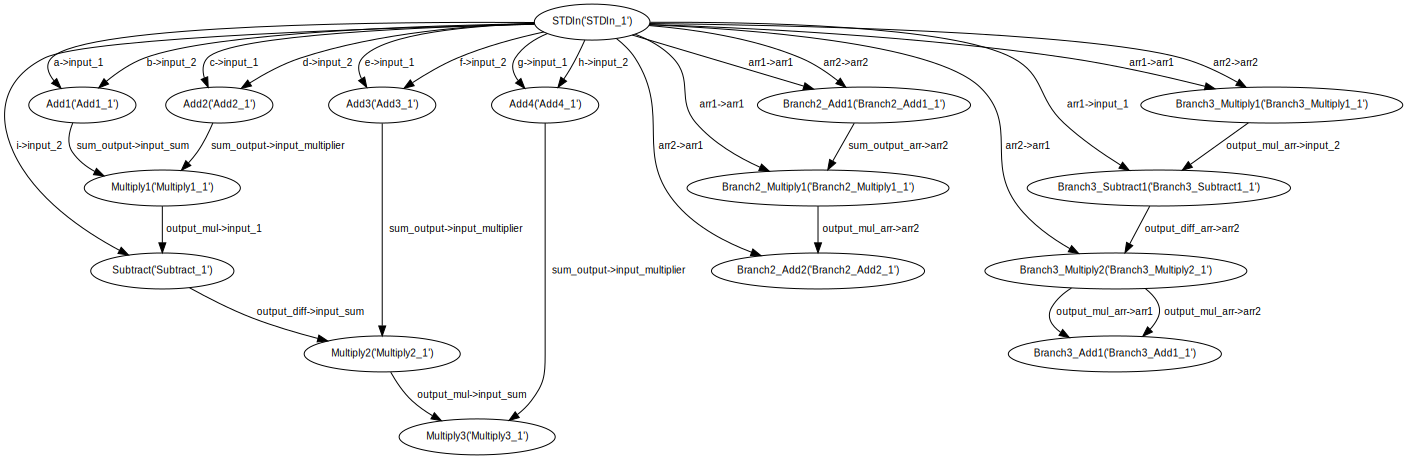

In [8]:
pipeline

In [9]:
branch3__add1.execute()

{}